In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')

In [4]:
# to display all columns
pd.set_option('display.max_columns', None)


In [5]:
company = pd.read_csv("/content/companies.csv")

In [6]:
company.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [7]:
company.shape

(4720, 44)

A. Data Cleaning
Delete irrelevant & redundant information
Remove noise or unreliable data (missing values and outliers)

1. Delete irrelevant and redundant information

a. Delete 'region','city','state_code' as they provide too much of granularity.
b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',
'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',
'invested_companies' as they are irrelevant features.
d. Delete those which has more than 98% of null values.

In [8]:
company.drop(['region','city','state_code'], axis=1,inplace=True)
company.drop(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at'], axis=1,inplace=True)
company.drop([ 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height', 'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies'], axis=1,inplace=True)

In [9]:
# Since we can see only nan values so let's check how much of ros has nan values.
percent_missing = company. isnull(). sum() * 100 / len(company)
print("percentage of nan in each columns:")
percent_missing.sort_values()

percentage of nan in each columns:


status                  0.000000
category_code          20.444915
relationships          32.245763
founded_at             34.258475
country_code           36.864407
lat                    39.322034
lng                    39.322034
milestones             56.377119
last_milestone_at      56.377119
first_milestone_at     56.377119
funding_rounds         79.067797
first_funding_at       79.470339
last_funding_at        79.491525
funding_total_usd      82.457627
closed_at              96.355932
investment_rounds      98.072034
last_investment_at     98.114407
first_investment_at    98.114407
ROI                    98.940678
dtype: float64

In [10]:
# Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
company.drop(['first_investment_at','last_investment_at','investment_rounds','ROI'], axis=1,inplace=True)

In [11]:
company.shape

(4720, 15)

In [12]:

company.isna().sum()

category_code          965
status                   0
founded_at            1617
closed_at             4548
country_code          1740
first_funding_at      3751
last_funding_at       3752
funding_rounds        3732
funding_total_usd     3892
first_milestone_at    2661
last_milestone_at     2661
milestones            2661
relationships         1522
lat                   1856
lng                   1856
dtype: int64

In [13]:
# Drop missing values
company.dropna(subset=['category_code', 'status', 'founded_at', 'country_code', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships','lat', 'lng'], inplace=True)

In [14]:
company.shape

(500, 15)

**Outliers**

<Axes: xlabel='funding_total_usd'>

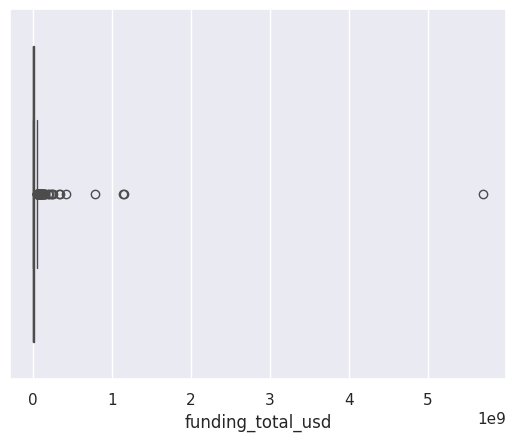

In [15]:
# 'funding_total_usd'
sns.boxplot(x=company["funding_total_usd"])

In [16]:
# For funding_total_usd

Q1_FTU = company.funding_total_usd.quantile(0.25)
Q3_FTU = company.funding_total_usd.quantile(0.75)
Q1_FTU, Q3_FTU
IQR_FTU = Q3_FTU - Q1_FTU
print(f"IQR of funding_total_usd is: {IQR_FTU}\n")

# For funding_total_usd
lower_limit_FTU = Q1_FTU - 1.5*IQR_FTU
upper_limit_FTU = Q3_FTU + 1.5*IQR_FTU
print("funding_total_usd")
print(f"lower limit is: {lower_limit_FTU}")
print(f"upper limit is: {upper_limit_FTU}\n")

# For funding_total_usd
funding_total_usd_outliers=company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)]
print(f"Outliers{funding_total_usd_outliers.shape}")

# For funding_total_usd
company.drop(company[(company.funding_total_usd<lower_limit_FTU)|(company.funding_total_usd>upper_limit_FTU)].index,inplace=True)

IQR of funding_total_usd is: 23000000.0

funding_total_usd
lower limit is: -33000000.0
upper limit is: 59000000.0

Outliers(49, 15)


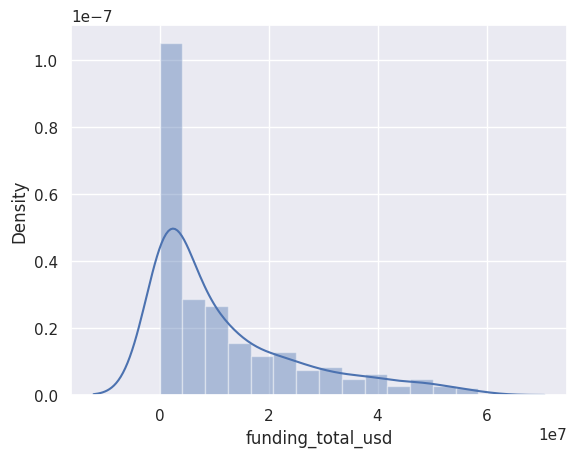

In [17]:
sns.distplot(company['funding_total_usd'])
plt.show()

<Axes: xlabel='relationships'>

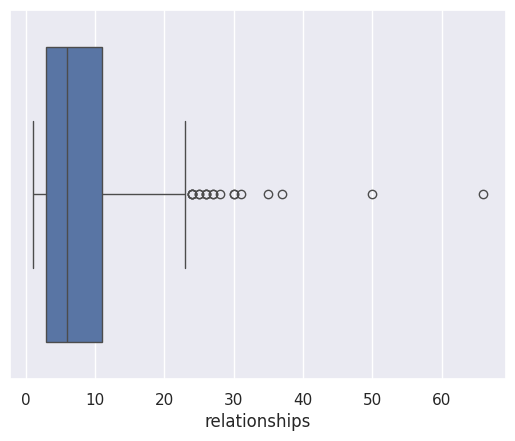

In [18]:
sns.boxplot(x=company["relationships"])

In [19]:

# For relationships

Q1_rel = company.relationships.quantile(0.25)
Q3_rel = company.relationships.quantile(0.75)
Q1_rel, Q3_rel
IQR_rel = Q3_rel - Q1_rel
print(f"IQR of relationships is: {IQR_rel}\n")

# For relationships
lower_limit_rel = Q1_rel - 1.5*IQR_rel
upper_limit_rel = Q3_rel + 1.5*IQR_rel
print("relationships")
print(f"lower limit is: {lower_limit_rel}")
print(f"upper limit is: {upper_limit_rel}\n")

# For relationships
relationships_outliers=company[(company.relationships<lower_limit_rel)|(company.relationships>upper_limit_rel)]
print(f"Outliers{relationships_outliers.shape}")

# For relationships
company.drop(company[(company.relationships<lower_limit_rel)|(company.relationships>upper_limit_rel)].index,inplace=True)

IQR of relationships is: 8.0

relationships
lower limit is: -9.0
upper limit is: 23.0

Outliers(19, 15)


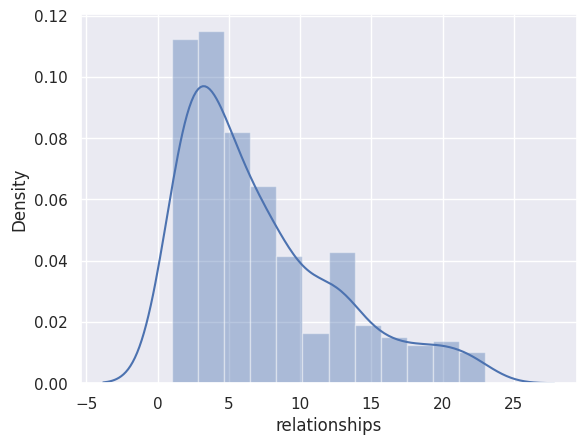

In [20]:
sns.distplot(company['relationships'])
plt.show()

In [21]:
company.describe()

,funding_rounds,funding_total_usd,milestones,relationships,lat,lng
count,432.000000,4.320000e+02,432.000000,432.000000,432.000000,432.000000
mean,2.166667,1.098350e+07,2.067130,7.136574,39.744666,-72.350089
std,1.350432,1.300601e+07,1.086783,5.405794,9.112534,59.753983
min,1.000000,2.454000e+03,1.000000,1.000000,-34.035086,-127.647621
25%,1.000000,1.200000e+06,1.000000,3.000000,37.386052,-122.091421
50%,2.000000,5.245064e+06,2.000000,5.000000,38.034945,-87.629798
75%,3.000000,1.608250e+07,3.000000,10.000000,42.501004,-71.058880
max,9.000000,5.850000e+07,7.000000,23.000000,64.126521,153.025124


In [22]:
# For founded_at
company['founded_at']=pd.to_datetime(company['founded_at'], format='%Y-%m-%d').dt.year

# closed_at
company['closed_at']=pd.to_datetime(company['closed_at'], format='%Y-%m-%d').dt.year

# first_funding_at
company['first_funding_at']=pd.to_datetime(company['first_funding_at'], format='%Y-%m-%d').dt.year

# last_funding_at
company['last_funding_at']=pd.to_datetime(company['last_funding_at'], format='%Y-%m-%d').dt.year

# first_milestone_at
company['first_milestone_at']=pd.to_datetime(company['first_milestone_at'], format='%Y-%m-%d').dt.year


# last_milestone_at
company['last_milestone_at']=pd.to_datetime(company['last_milestone_at'], format='%Y-%m-%d').dt.year

company.dtypes

category_code          object
status                 object
founded_at              int64
closed_at             float64
country_code           object
first_funding_at        int64
last_funding_at         int64
funding_rounds        float64
funding_total_usd     float64
first_milestone_at      int64
last_milestone_at       int64
milestones            float64
relationships         float64
lat                   float64
lng                   float64
dtype: object

In [23]:
# 1. category_code
print('Total number of unique categories are:',company.category_code.nunique())
company.category_code.unique()

Total number of unique categories are: 35


array(['web', 'cleantech', 'analytics', 'mobile', 'enterprise',
       'games_video', 'news', 'software', 'ecommerce', 'other',
       'security', 'advertising', 'photo_video', 'finance', 'travel',
       'public_relations', 'transportation', 'hospitality', 'biotech',
       'health', 'education', 'medical', 'social', 'network_hosting',
       'nonprofit', 'search', 'sports', 'fashion', 'messaging',
       'consulting', 'music', 'hardware', 'legal', 'semiconductor',
       'real_estate'], dtype=object)

In [24]:
company.category_code.value_counts()

web                 73
software            68
mobile              41
advertising         37
enterprise          33
games_video         29
ecommerce           21
security            12
analytics            9
search               8
public_relations     8
social               7
network_hosting      7
finance              7
travel               7
messaging            6
hardware             6
education            5
photo_video          5
music                5
cleantech            4
biotech              4
sports               4
transportation       4
health               3
nonprofit            3
other                3
news                 3
consulting           3
medical              2
legal                1
semiconductor        1
hospitality          1
fashion              1
real_estate          1
Name: category_code, dtype: int64

In [25]:
# category_encoding
category_others_index = company.category_code.value_counts()[14:].index
company['category_code'] = company['category_code'].replace(to_replace=category_others_index,value='other')

In [26]:
# Let's check if we've more than 15 columns
print('Unique no of category_code : ',company['category_code'].nunique())
company.category_code.value_counts()

Unique no of category_code :  15


web                 73
other               72
software            68
mobile              41
advertising         37
enterprise          33
games_video         29
ecommerce           21
security            12
analytics            9
public_relations     8
search               8
finance              7
social               7
network_hosting      7
Name: category_code, dtype: int64

In [27]:
print('Total number of unique categories are:',company.country_code.nunique())
company.country_code.unique()

Total number of unique categories are: 32


array(['USA', 'AUS', 'SWE', 'DEU', 'JPN', 'GBR', 'RUS', 'ISL', 'CAN',
       'CHE', 'ISR', 'TUR', 'FRA', 'ZAF', 'MYS', 'ESP', 'IND', 'KOR',
       'DNK', 'IRL', 'CHN', 'EST', 'PHL', 'BEL', 'PRT', 'SGP', 'NLD',
       'UKR', 'MEX', 'IDN', 'POL', 'SVK'], dtype=object)

In [28]:
country_code_others_index = company['country_code'].value_counts()[9:].index
company['country_code'] = company['country_code'].replace(to_replace=country_code_others_index,value='other')

In [29]:
print('Total number of unique countries are:',company.country_code.nunique())
company.country_code.unique()

Total number of unique countries are: 10


array(['USA', 'other', 'DEU', 'GBR', 'CAN', 'CHE', 'ISR', 'FRA', 'IND',
       'IRL'], dtype=object)

Create new variables¶

Create new feature isClosed from closed_at and status.
Create new feature 'active_days'
1. Create new feature isClosed from closed_at and status.

if the value in status is 'operating' or 'ipo', Let's put 0.

Where as if the value is 'acquired' or 'closed', let's put 1.

In [30]:
def isClosed(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return 0
    else:
        return 1
company['isClosed'] = company.apply(lambda rw: isClosed(rw),axis=1)
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed
0,web,operating,2005,NaN,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0
13,web,acquired,2007,NaN,USA,2008,2008,1.0,5000000.0,2008,2012,3.0,14.0,37.386052,-122.083851,1
20,other,operating,2003,NaN,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0
24,analytics,operating,2006,NaN,USA,2008,2013,3.0,33000000.0,2010,2013,3.0,19.0,37.774929,-122.419415,0
26,mobile,operating,2003,NaN,other,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,software,operating,2004,NaN,USA,2012,2012,2.0,2000000.0,2001,2012,2.0,1.0,39.004554,-76.875528,0
4646,advertising,operating,2003,NaN,USA,2008,2011,2.0,20000000.0,2006,2006,1.0,4.0,34.052234,-118.243685,0
4647,web,closed,2007,2010.0,USA,2008,2008,1.0,1700000.0,2008,2008,1.0,1.0,34.052234,-118.243685,1
4663,mobile,operating,2010,NaN,GBR,2012,2012,2.0,33102.0,2010,2010,1.0,2.0,54.597285,-5.930120,0


In [31]:
company['closed_at']=(np.where((company['status']=='operating')|(company['status']=='ipo'),2021,company['closed_at']))


In [32]:
company = company.dropna()

In [33]:
company.shape

(344, 16)

In [34]:

company.duplicated().sum()

0

In [35]:
# Let's delete all the duplicate values
company.drop_duplicates(inplace=True)

In [36]:
company.isClosed.value_counts()

0    308
1     36
Name: isClosed, dtype: int64

2. Create active_days column from founded_at and closed_at column
Active days = founded_at - closed_at

In [37]:
company['active_days'] = 365*(company.closed_at - company.founded_at)

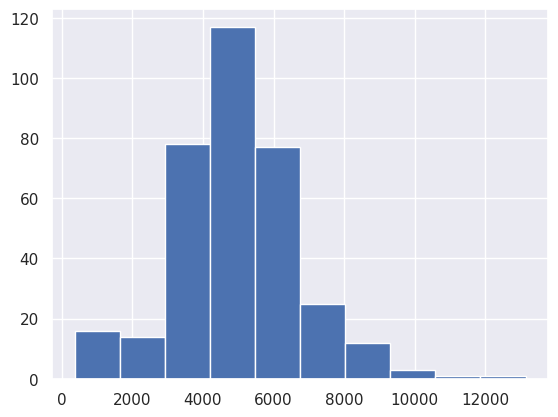

In [38]:
plt.hist(company['active_days'], bins=10)
plt.show()

In [39]:
print(company.columns)

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days'],
      dtype='object')


In [40]:
company.to_csv('final_company', index=False)

**EDA**

In [41]:
company.describe()

,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
count,344.000000,344.000000,344.000000,344.000000,344.000000,3.440000e+02,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2006.526163,2019.988372,2008.872093,2010.514535,2.162791,1.071542e+07,2009.566860,2010.773256,1.956395,6.758721,39.818176,-67.802227,0.104651,4913.706395
std,3.787260,3.002406,2.567101,2.223599,1.375423,1.318080e+07,2.590891,2.527005,1.030647,5.301129,9.836409,62.270051,0.306549,1747.870340
min,1985.000000,2008.000000,1998.000000,2000.000000,1.000000,2.454000e+03,1993.000000,1993.000000,1.000000,1.000000,-34.035086,-127.647621,0.000000,365.000000
25%,2005.000000,2021.000000,2007.000000,2009.000000,1.000000,1.000000e+06,2008.000000,2010.000000,1.000000,3.000000,37.386052,-122.083851,0.000000,4015.000000
50%,2007.000000,2021.000000,2009.000000,2011.000000,2.000000,5.000000e+06,2010.000000,2011.000000,2.000000,5.000000,38.514569,-84.154361,0.000000,4745.000000
75%,2009.000000,2021.000000,2011.000000,2012.000000,3.000000,1.600000e+07,2011.000000,2013.000000,3.000000,9.000000,43.653226,-6.177762,0.000000,5475.000000
max,2012.000000,2021.000000,2013.000000,2013.000000,9.000000,5.850000e+07,2013.000000,2013.000000,7.000000,23.000000,64.126521,153.025124,1.000000,13140.000000


0    308
1     36
Name: isClosed, dtype: int64


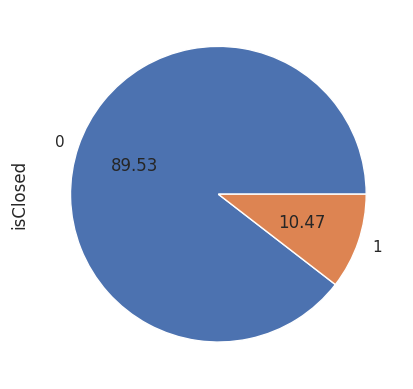

In [42]:
print(company.isClosed.value_counts())
company['isClosed'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

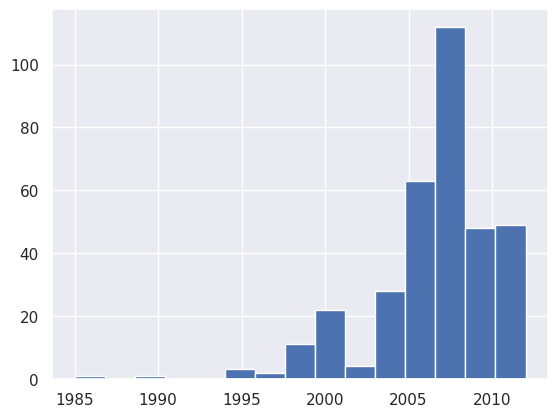

In [43]:
plt.hist(company['founded_at'], bins=15)
plt.show()

In [44]:

print(company.columns)

Index(['category_code', 'status', 'founded_at', 'closed_at', 'country_code',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'lat', 'lng', 'isClosed', 'active_days'],
      dtype='object')


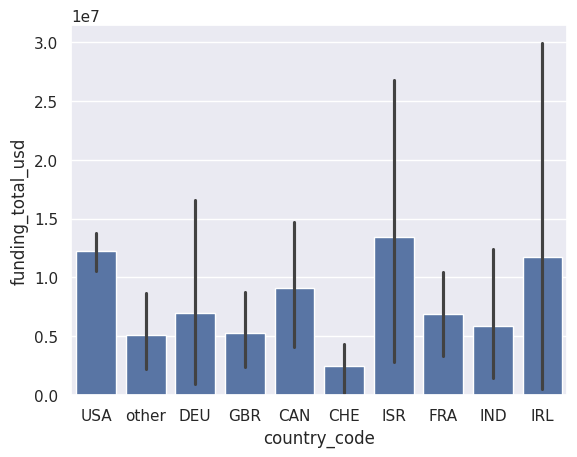

In [45]:
sns.barplot(x=company['country_code'], y=company['funding_total_usd'])
plt.show()

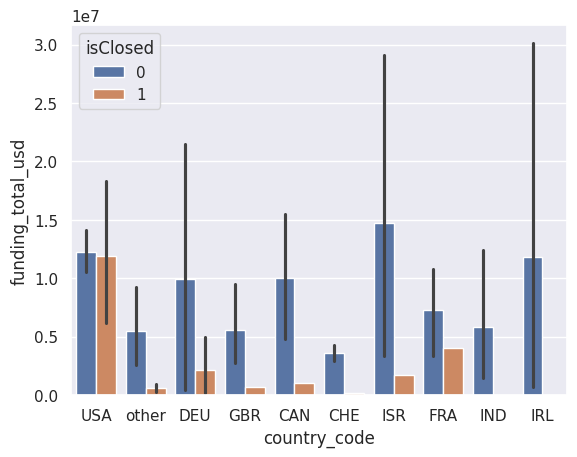

In [46]:
sns.barplot(x='country_code', y='funding_total_usd', hue='isClosed', data=company)
plt.show()

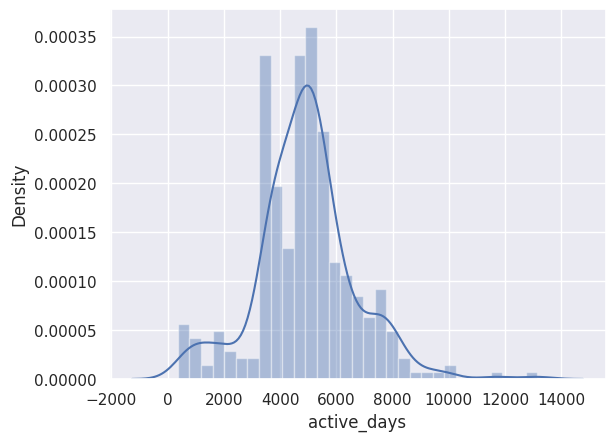

In [47]:
sns.distplot(company['active_days'])
plt.show()

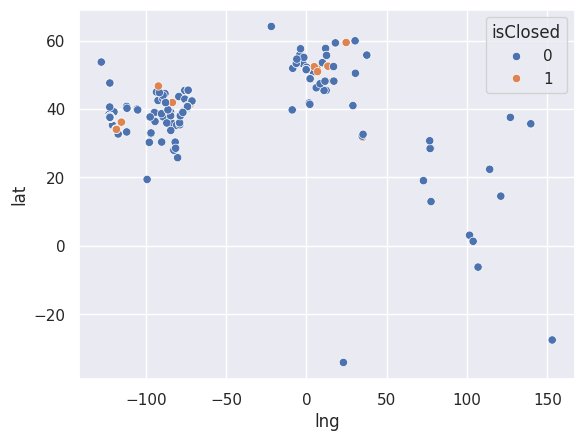

In [48]:
sns.scatterplot(x='lng', y='lat', hue='isClosed', data=company)
plt.show()

In [49]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,operating,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
20,other,operating,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
24,analytics,operating,2006,2021.0,USA,2008,2013,3.0,33000000.0,2010,2013,3.0,19.0,37.774929,-122.419415,0,5475.0
26,mobile,operating,2003,2021.0,other,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
45,enterprise,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4639,software,operating,2004,2021.0,USA,2012,2012,2.0,2000000.0,2001,2012,2.0,1.0,39.004554,-76.875528,0,6205.0
4646,advertising,operating,2003,2021.0,USA,2008,2011,2.0,20000000.0,2006,2006,1.0,4.0,34.052234,-118.243685,0,6570.0
4647,web,closed,2007,2010.0,USA,2008,2008,1.0,1700000.0,2008,2008,1.0,1.0,34.052234,-118.243685,1,1095.0
4663,mobile,operating,2010,2021.0,GBR,2012,2012,2.0,33102.0,2010,2010,1.0,2.0,54.597285,-5.930120,0,4015.0


In [50]:
#import necessary libraries

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
warnings.filterwarnings('ignore')


In [51]:
company = pd.read_csv('final_company')

In [52]:
company.sample(50)

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
46,analytics,operating,2010,2021.0,USA,2010,2013,3.0,2475000.0,2010,2010,1.0,2.0,44.519159,-88.019826,0,4015.0
48,enterprise,operating,2005,2021.0,USA,2006,2013,4.0,25830908.0,2013,2013,1.0,10.0,30.267153,-97.743061,0,5840.0
160,advertising,closed,2007,2012.0,USA,2008,2008,1.0,50000.0,2007,2008,2.0,7.0,37.774929,-122.419415,1,1825.0
57,mobile,operating,2011,2021.0,USA,2011,2011,1.0,1200000.0,2013,2013,1.0,3.0,37.774929,-122.419415,0,3650.0
7,web,operating,2007,2021.0,USA,2007,2007,1.0,350000.0,2008,2008,1.0,2.0,37.452960,-122.181725,0,5110.0
5,web,operating,2006,2021.0,USA,2007,2007,1.0,2500000.0,2010,2012,2.0,7.0,37.774929,-122.419415,0,5475.0
190,web,closed,2011,2012.0,USA,2011,2011,2.0,450000.0,2011,2011,1.0,1.0,41.296016,-72.384530,1,365.0
330,advertising,operating,2006,2021.0,USA,2007,2007,1.0,1000000.0,2006,2009,3.0,1.0,37.774929,-122.419415,0,5475.0
249,software,operating,2006,2021.0,CAN,2008,2012,2.0,12400000.0,2011,2013,2.0,6.0,45.421530,-75.697193,0,5475.0
61,software,operating,2010,2021.0,other,2009,2009,1.0,100000.0,2009,2009,1.0,1.0,-34.035086,23.046469,0,4015.0


**Corelation and Multicolinarity**




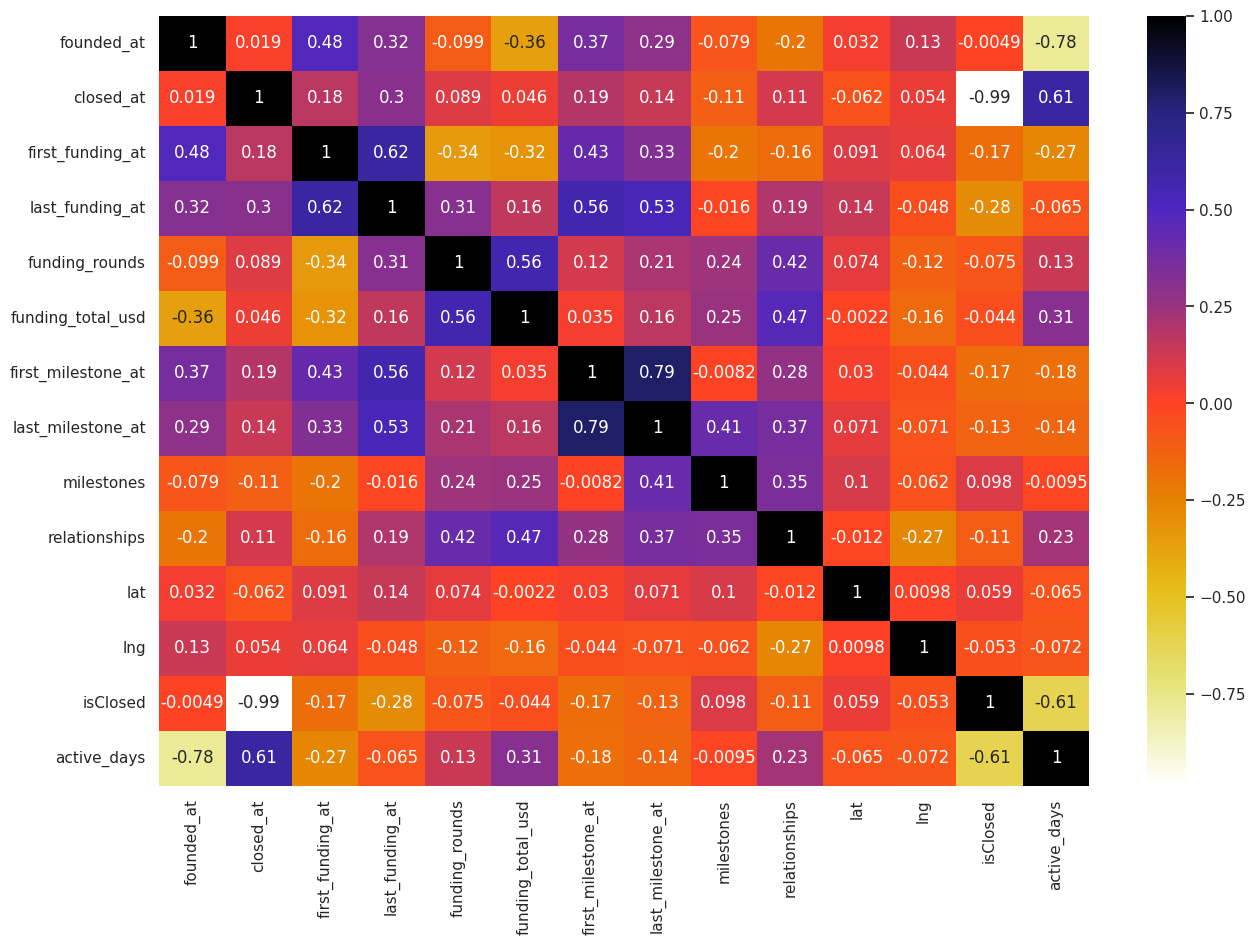

In [53]:
#Using Pearson Correlation
numerical_columns = company.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,10))
cor = numerical_columns.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [54]:
cor["isClosed"].sort_values(ascending=False)

isClosed              1.000000
milestones            0.097535
lat                   0.058686
founded_at           -0.004876
funding_total_usd    -0.044064
lng                  -0.052858
funding_rounds       -0.075096
relationships        -0.106413
last_milestone_at    -0.131112
first_milestone_at   -0.166678
first_funding_at     -0.168180
last_funding_at      -0.284526
active_days          -0.614958
closed_at            -0.986978
Name: isClosed, dtype: float64

In [55]:
# Import library for VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [56]:
vif_df = company.drop(["isClosed",'category_code','country_code'], axis=1)

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def calc_vif(df):
    # Exclude non-numeric columns
    numeric_df = df.select_dtypes(include=[np.number])

    # Check for missing values
    if numeric_df.isnull().values.any():
        raise ValueError("DataFrame contains missing values (NaNs)")

    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_df.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

# Call the calc_vif function with your DataFrame
vif_results = calc_vif(vif_df)
print(vif_results)

               feature           VIF
0           founded_at           inf
1            closed_at           inf
2     first_funding_at  2.388252e+06
3      last_funding_at  3.059218e+06
4       funding_rounds  8.930033e+00
5    funding_total_usd  3.134154e+00
6   first_milestone_at  2.776448e+06
7    last_milestone_at  3.405818e+06
8           milestones  1.044315e+01
9        relationships  4.410078e+00
10                 lat  1.836930e+01
11                 lng  2.397973e+00
12         active_days           inf


In [58]:
X = company.drop(["isClosed",'category_code','country_code','last_milestone_at','first_funding_at','founded_at','last_funding_at','first_milestone_at'], axis=1)

In [59]:
calc_vif(X)

,feature,VIF
0,closed_at,31.301456
1,funding_rounds,5.394723
2,funding_total_usd,2.878512
3,milestones,5.489826
4,relationships,4.051085
5,lat,17.845083
6,lng,2.362428
7,active_days,10.282458


In [60]:
# company = company.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

one hot encoding

In [61]:
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,operating,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
1,other,operating,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
2,analytics,operating,2006,2021.0,USA,2008,2013,3.0,33000000.0,2010,2013,3.0,19.0,37.774929,-122.419415,0,5475.0
3,mobile,operating,2003,2021.0,other,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
4,enterprise,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,software,operating,2004,2021.0,USA,2012,2012,2.0,2000000.0,2001,2012,2.0,1.0,39.004554,-76.875528,0,6205.0
340,advertising,operating,2003,2021.0,USA,2008,2011,2.0,20000000.0,2006,2006,1.0,4.0,34.052234,-118.243685,0,6570.0
341,web,closed,2007,2010.0,USA,2008,2008,1.0,1700000.0,2008,2008,1.0,1.0,34.052234,-118.243685,1,1095.0
342,mobile,operating,2010,2021.0,GBR,2012,2012,2.0,33102.0,2010,2010,1.0,2.0,54.597285,-5.930120,0,4015.0


In [62]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.category_code, prefix='category', drop_first=True)
dummies

,category_analytics,category_ecommerce,category_enterprise,category_finance,category_games_video,category_mobile,category_network_hosting,category_other,category_public_relations,category_search,category_security,category_social,category_software,category_web
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0,0,0,0,0,0,0,0,0,0,0,0,1,0
340,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341,0,0,0,0,0,0,0,0,0,0,0,0,0,1
342,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [63]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_ecommerce,category_enterprise,category_finance,category_games_video,category_mobile,category_network_hosting,category_other,category_public_relations,category_search,category_security,category_social,category_software,category_web
0,web,operating,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,other,operating,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,analytics,operating,2006,2021.0,USA,2008,2013,3.0,33000000.0,2010,2013,3.0,19.0,37.774929,-122.419415,0,5475.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mobile,operating,2003,2021.0,other,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,enterprise,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,software,operating,2004,2021.0,USA,2012,2012,2.0,2000000.0,2001,2012,2.0,1.0,39.004554,-76.875528,0,6205.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
340,advertising,operating,2003,2021.0,USA,2008,2011,2.0,20000000.0,2006,2006,1.0,4.0,34.052234,-118.243685,0,6570.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
341,web,closed,2007,2010.0,USA,2008,2008,1.0,1700000.0,2008,2008,1.0,1.0,34.052234,-118.243685,1,1095.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
342,mobile,operating,2010,2021.0,GBR,2012,2012,2.0,33102.0,2010,2010,1.0,2.0,54.597285,-5.930120,0,4015.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [64]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['category_code'], axis=1,inplace=True)

In [65]:
# One-hot encoding to category_code
dummies = pd.get_dummies(company.country_code, prefix='country', drop_first=True)
dummies

,country_CHE,country_DEU,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
339,0,0,0,0,0,0,0,1,0
340,0,0,0,0,0,0,0,1,0
341,0,0,0,0,0,0,0,1,0
342,0,0,0,1,0,0,0,0,0


In [66]:
# Concatenate category with company dataset
company = pd.concat([company,dummies],axis='columns')
company

,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_ecommerce,category_enterprise,category_finance,category_games_video,category_mobile,category_network_hosting,category_other,category_public_relations,category_search,category_security,category_social,category_software,category_web,country_CHE,country_DEU,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other
0,operating,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,operating,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,operating,2006,2021.0,USA,2008,2013,3.0,33000000.0,2010,2013,3.0,19.0,37.774929,-122.419415,0,5475.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,operating,2003,2021.0,other,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,operating,2004,2021.0,USA,2012,2012,2.0,2000000.0,2001,2012,2.0,1.0,39.004554,-76.875528,0,6205.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
340,operating,2003,2021.0,USA,2008,2011,2.0,20000000.0,2006,2006,1.0,4.0,34.052234,-118.243685,0,6570.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
341,closed,2007,2010.0,USA,2008,2008,1.0,1700000.0,2008,2008,1.0,1.0,34.052234,-118.243685,1,1095.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
342,operating,2010,2021.0,GBR,2012,2012,2.0,33102.0,2010,2010,1.0,2.0,54.597285,-5.930120,0,4015.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [67]:
# Since, We've added the encoded country_code , let's delete original category_code
company.drop(['country_code'], axis=1,inplace=True)

In [68]:
company


,status,founded_at,closed_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days,category_analytics,category_ecommerce,category_enterprise,category_finance,category_games_video,category_mobile,category_network_hosting,category_other,category_public_relations,category_search,category_security,category_social,category_software,category_web,country_CHE,country_DEU,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other
0,operating,2005,2021.0,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,operating,2003,2021.0,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,operating,2006,2021.0,2008,2013,3.0,33000000.0,2010,2013,3.0,19.0,37.774929,-122.419415,0,5475.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,operating,2003,2021.0,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,operating,2004,2021.0,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,operating,2004,2021.0,2012,2012,2.0,2000000.0,2001,2012,2.0,1.0,39.004554,-76.875528,0,6205.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
340,operating,2003,2021.0,2008,2011,2.0,20000000.0,2006,2006,1.0,4.0,34.052234,-118.243685,0,6570.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
341,closed,2007,2010.0,2008,2008,1.0,1700000.0,2008,2008,1.0,1.0,34.052234,-118.243685,1,1095.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
342,operating,2010,2021.0,2012,2012,2.0,33102.0,2010,2010,1.0,2.0,54.597285,-5.930120,0,4015.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [69]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True,
                                                    test_size=0.2)


In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts()[0]/y_train.value_counts()[1])
print(y_test)

(275, 37)
(69, 37)
8.482758620689655
96     0
33     0
282    1
280    0
82     0
      ..
112    0
269    0
267    0
17     0
272    0
Name: isClosed, Length: 69, dtype: int64


**oversampling**

In [72]:
print(X_train.shape)
print(y_test.shape)

(275, 37)
(69,)


In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts()[0]/y_train.value_counts()[1])
print(y_test.value_counts()[0]/y_test.value_counts()[1])

(275, 37)
(69, 37)
8.482758620689655
8.857142857142858


In [74]:
y_train.value_counts()

0    246
1     29
Name: isClosed, dtype: int64

**Model Building**

XG Boost

Random Forest


Logistic Regression

SVM

**Random Forest**

In [75]:
#testing on training set
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'X_train' is your feature data and 'y_train' is your target labels

# Perform one-hot encoding on categorical variables in your feature data
X_train_encoded = pd.get_dummies(X_train)

# Instantiate the random forest classifier
rf_clf = RandomForestClassifier()

# Train the classifier using your training data
rf_clf.fit(X_train_encoded, y_train)

# Now you can use rf_clf to make predictions
rf_clf_predict = rf_clf.predict(X_train_encoded)

# Print confusion matrix, accuracy score, and classification report
print(confusion_matrix(y_train, rf_clf_predict))
print(accuracy_score(y_train, rf_clf_predict))
print(classification_report(y_train, rf_clf_predict))


[[246   0]
 [  0  29]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00        29

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [76]:
import pandas as pd

# Assuming 'X_test' is your testing feature data

# Perform one-hot encoding on categorical variables in your testing feature data
X_test_encoded = pd.get_dummies(X_test)

# Now you can use rf_clf to make predictions on the encoded testing data
rf_clf_predict = rf_clf.predict(X_test_encoded)

# Print confusion matrix, accuracy score, and classification report
print(confusion_matrix(y_test, rf_clf_predict))
print(accuracy_score(y_test, rf_clf_predict))
print(classification_report(y_test, rf_clf_predict))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- status_acquired


**LogisticRegression**

In [77]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Assuming 'X_train' is your training feature data and 'y_train' is your target labels

# Perform one-hot encoding on categorical variables in your training feature data
X_train_encoded = pd.get_dummies(X_train)

# Instantiate the logistic regression model
log_reg = LogisticRegression()

# Train the model using your training data
log_reg.fit(X_train_encoded, y_train)

# Now you can use log_reg to make predictions
log_reg_predict = log_reg.predict(X_train_encoded)

# Print confusion matrix, accuracy score, and classification report
print(confusion_matrix(y_train, log_reg_predict))
print(accuracy_score(y_train, log_reg_predict))
print(classification_report(y_train, log_reg_predict))


[[245   1]
 [  2  27]]
0.9890909090909091
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       246
           1       0.96      0.93      0.95        29

    accuracy                           0.99       275
   macro avg       0.98      0.96      0.97       275
weighted avg       0.99      0.99      0.99       275



In [78]:
import pandas as pd

# Assuming 'X_test' is your testing feature data

# Perform one-hot encoding on categorical variables in your testing feature data
X_test_encoded = pd.get_dummies(X_test)

# Now you can use log_reg to make predictions on the encoded testing data
log_reg_predict = log_reg.predict(X_test_encoded)

# Print confusion matrix, accuracy score, and classification report
print(confusion_matrix(y_test, log_reg_predict))
print(accuracy_score(y_test, log_reg_predict))
print(classification_report(y_test, log_reg_predict))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- status_acquired


**SVM**

In [79]:

from sklearn.svm import SVC

# Assuming 'X_train' is your training feature data and 'y_train' is your target labels

# Perform one-hot encoding on categorical variables in your training feature data
X_train_encoded = pd.get_dummies(X_train)

# Instantiate the SVC model
svc = SVC()

# Train the model using your training data
svc.fit(X_train_encoded, y_train)


SVC()

In [81]:


# Assuming 'X_test' is your testing feature data

# Perform one-hot encoding on categorical variables in your testing feature data
X_test_encoded = pd.get_dummies(X_test)

# Now you can use svc to make predictions on the encoded testing data
svc_predict = svc.predict(X_test_encoded)

# Print confusion matrix, accuracy score, and classification report
print(confusion_matrix(y_test, svc_predict))
print(accuracy_score(y_test, svc_predict))
print(classification_report(y_test, svc_predict))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- status_acquired


In [82]:
company = pd.read_csv('final_company')

In [83]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True,
                                                    test_size=0.2)

one hot encoading and Scaling

In [85]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [86]:
ohe    = OneHotEncoder(sparse=False)
scaler = StandardScaler()


In [87]:
columns_to_encode = ['category_code', 'country_code']
columns_to_scale = ['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'active_days']


In [88]:
pd.DataFrame(X_train)

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,active_days
228,web,operating,2007,2021.0,USA,2007,2011,4.0,20500000.0,2010,2013,4.0,22.0,37.774929,-122.419415,5110.0
123,other,operating,2006,2021.0,USA,2011,2011,2.0,11000000.0,2011,2011,1.0,12.0,38.978754,-94.567349,5475.0
4,enterprise,operating,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,6205.0
280,other,operating,2010,2021.0,USA,2011,2011,3.0,5000.0,2011,2011,1.0,3.0,44.811349,-91.498494,4015.0
148,other,operating,2007,2021.0,USA,2008,2012,3.0,21000000.0,2008,2012,3.0,5.0,37.774929,-122.419415,5110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,other,operating,2011,2021.0,GBR,2011,2013,2.0,4400000.0,2011,2011,1.0,7.0,51.507351,-0.127758,3650.0
20,advertising,operating,2007,2021.0,USA,2007,2010,3.0,27000000.0,2012,2012,1.0,13.0,37.562992,-122.325525,5110.0
97,finance,operating,2006,2021.0,USA,2011,2011,1.0,2000000.0,2011,2012,2.0,10.0,40.712775,-74.005973,5475.0
180,other,operating,2007,2021.0,other,2008,2012,3.0,6000000.0,2011,2012,3.0,10.0,50.850346,4.351721,5110.0


In [89]:
scaled_columns = np.array([[1, 2, 3], [4, 5, 6]])
encoded_columns = np.array([[7, 8], [9, 10]])

X_train = np.concatenate([scaled_columns, encoded_columns], axis=1)


Handling Imbalanced Dataset

In [90]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (2, 5)
Shape of y_train: (275,)


Lets create Pipeline

pipe1 - without scaling data

pipe2 - with scaling data



In [91]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [92]:
pd.set_option('display.max_columns', None)

In [93]:
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')

In [94]:
company = pd.read_csv('final_company')

In [95]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True,
                                                    test_size=0.2)


In [97]:
X_train

,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,active_days
85,other,operating,2011,2021.0,USA,2011,2011,1.0,100000.0,2011,2011,1.0,2.0,40.712775,-74.005973,3650.0
285,other,operating,2011,2021.0,other,2013,2013,1.0,380000.0,2013,2013,1.0,2.0,-6.175110,106.865039,3650.0
53,ecommerce,operating,2009,2021.0,USA,2013,2013,1.0,8700000.0,2012,2013,2.0,5.0,37.558546,-122.271079,4380.0
270,software,operating,2000,2021.0,USA,2003,2012,3.0,14603757.0,2005,2005,1.0,8.0,37.678074,-97.239236,7665.0
54,other,operating,2008,2021.0,USA,2009,2011,3.0,11510000.0,2010,2012,4.0,6.0,42.360082,-71.058880,4745.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,mobile,operating,2010,2021.0,GBR,2011,2011,1.0,2502039.0,2012,2012,2.0,5.0,51.507351,-0.127758,4015.0
314,enterprise,closed,2010,2012.0,CAN,2007,2007,1.0,1000000.0,2008,2010,2.0,5.0,45.501689,-73.567256,730.0
211,search,operating,2006,2021.0,other,2008,2008,2.0,40000000.0,2006,2006,1.0,1.0,35.689487,139.691706,5475.0
167,mobile,operating,2007,2021.0,USA,2008,2013,4.0,30700000.0,2012,2012,1.0,22.0,47.610150,-122.201516,5110.0


In [98]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe_category',OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'),[0]),
    ('ohe_country',OneHotEncoder(sparse=False,handle_unknown='ignore', drop='first'),[2])
],remainder='passthrough')

In [99]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_category',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [0]),
                                ('ohe_country',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [2])])

In [100]:
first_step = trf1.fit_transform(X_train)

In [101]:
pd.DataFrame(trf1.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,operating,2021.0,USA,2011,2011,1.0,100000.0,2011,2011,1.0,2.0,40.712775,-74.005973,3650.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,operating,2021.0,other,2013,2013,1.0,380000.0,2013,2013,1.0,2.0,-6.17511,106.865039,3650.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,operating,2021.0,USA,2013,2013,1.0,8700000.0,2012,2013,2.0,5.0,37.558546,-122.271079,4380.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,operating,2021.0,USA,2003,2012,3.0,14603757.0,2005,2005,1.0,8.0,37.678074,-97.239236,7665.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,operating,2021.0,USA,2009,2011,3.0,11510000.0,2010,2012,4.0,6.0,42.360082,-71.05888,4745.0


In [102]:
trf3 = xgb.XGBClassifier()

In [103]:
trf4= RandomForestClassifier()


In [104]:
trf5 = LogisticRegression()

In [105]:
trf6 = SVC()

In [106]:
from imblearn.pipeline import Pipeline
pipe1 = Pipeline([
    ('OHE',trf1),
    ('smote', SMOTE(random_state=11)),
#     ('XG BOOST',trf3)
#     ('Random Forest', trf4)
#     ('Logistic Regression', trf5)
    ('SVM', trf6)
])

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Assuming X_train contains your features and y_train contains your target variable

# Define preprocessing steps for categorical variables
# Assuming categorical_features_indices contains the indices of categorical features in your dataset
categorical_features_indices = [0, 1, 2]  # Example: categorical features are the first three columns

# Define preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_indices)
    ])


# Define the pipeline with preprocessing and model
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fit the pipeline to the training data
pipe1.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  [0, 1, 2])])),
                ('classifier', LogisticRegression())])

In [108]:
y_pred = pipe1.predict(X_train)

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[246   0]
 [  1  28]]
0.9963636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      0.97      0.98        29

    accuracy                           1.00       275
   macro avg       1.00      0.98      0.99       275
weighted avg       1.00      1.00      1.00       275



**pipe2**

In [110]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [111]:
company = pd.read_csv('final_company')

In [112]:
X = company.drop("isClosed", axis=1)
y = company["isClosed"]

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, shuffle = True,
                                                    test_size=0.2)

In [114]:
# X_train = X_train.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)


In [115]:
# X_test = X_test.drop(['first_funding_at', 'last_milestone_at', 'founded_at','last_funding_at','first_milestone_at'], axis=1)

In [116]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe_category',OneHotEncoder(sparse=False, handle_unknown='ignore', drop='first'),[0]),
    ('ohe_country',OneHotEncoder(sparse=False,handle_unknown='ignore', drop='first'),[2])
],remainder='passthrough')

In [117]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_category',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [0]),
                                ('ohe_country',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [2])])

In [118]:

first_step = trf1.fit_transform(X_train)

In [119]:
pd.DataFrame(trf1.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,operating,2021.0,IRL,2008,2013,4.0,46500000.0,2008,2013,3.0,15.0,53.349805,-6.26031,5840.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,operating,2021.0,USA,2007,2009,4.0,10600000.0,2010,2012,2.0,5.0,37.774929,-122.419415,6570.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,closed,2010.0,USA,2006,2008,2.0,7350000.0,2006,2009,3.0,8.0,40.712775,-74.005973,1825.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,operating,2021.0,USA,2007,2011,4.0,20500000.0,2010,2013,4.0,22.0,37.774929,-122.419415,5110.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,operating,2021.0,USA,2007,2008,2.0,3650000.0,2011,2013,2.0,12.0,40.233844,-111.658534,5475.0


In [120]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',StandardScaler(),slice(23,35))
],remainder='passthrough')

In [121]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 slice(23, 35, None))])

ColumnTransformer(remainder='passthrough',

                  transformers=[('scale', StandardScaler(),

                                 slice(23, 35, None))])

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [122]:
from imblearn.pipeline import Pipeline
pipe2 = Pipeline([
    ('OHE',trf1),
    ('smote', SMOTE(random_state=11)),
    ('scaling', trf2),
    ('Logistic Regression',trf5),
#     ('SVM',trf6)
])

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Define preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features_indices)
    ])

# Define the pipeline with preprocessing and model
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fit the pipeline to the training data
pipe2.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  [0, 1, 2])])),
                ('classifier', LogisticRegression())])

In [124]:
y_pred = pipe2.predict(X_train)

In [125]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_train,y_pred))
print(accuracy_score(y_train,y_pred))
print(classification_report(y_train,y_pred))

[[246   0]
 [  0  29]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00        29

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_indices)
    ])

# Define the pipeline with preprocessing and model
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Fit the pipeline to the training data
pipe2.fit(X_train, y_train)

# Predict using the pipeline on the test data
y_pred = pipe2.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[62  0]
 [ 0  7]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00         7

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



**Feature Engineering**

In [128]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA

In [129]:
# Define file path
file_path = 'companies.csv'

try:
    # Attempt to read the CSV file
    data = pd.read_csv('/content/companies.csv')
    # If successful, continue with further processing
    print("CSV file successfully loaded.")



except pd.errors.ParserError as e:
    # If there's an error while parsing the CSV file
    print("Error while parsing the CSV file:", e)

Error while parsing the CSV file: Error tokenizing data. C error: EOF inside string starting at row 30422


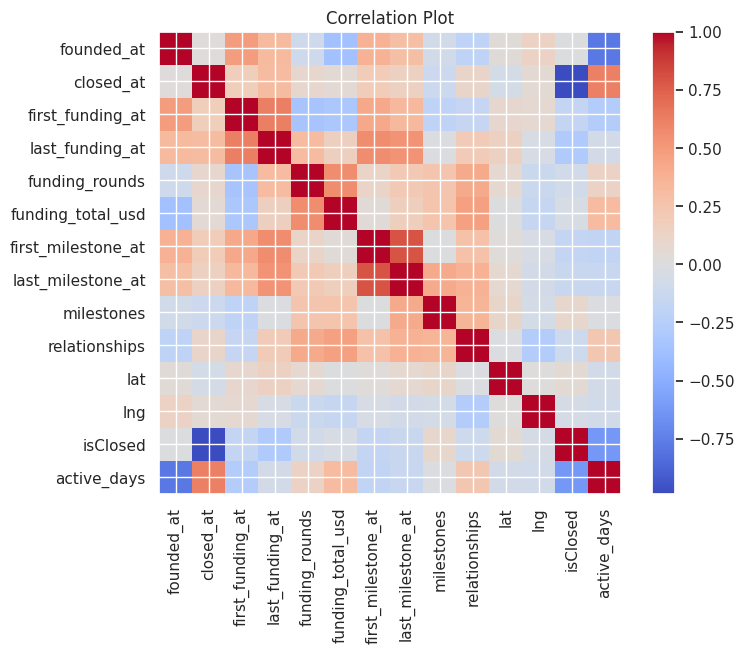

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure numeric data types for correlation calculation
numeric_company = company.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix using NumPy
correlation_matrix = np.corrcoef(numeric_company.values, rowvar=False)

# Create a heatmap using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Plot')
plt.xticks(np.arange(len(numeric_company.columns)), numeric_company.columns, rotation=90)
plt.yticks(np.arange(len(numeric_company.columns)), numeric_company.columns)
plt.show()


In [152]:
from sklearn.preprocessing import LabelEncoder


In [154]:
cat_stat = company['status'].unique()
print(cat_stat)

priority_stat = {'closed':0,'acquired':1,'ipo':2,'operating':3}
pr_stat = company['status'].map(priority_stat)

label_encoder = LabelEncoder()

company['status'] = label_encoder.fit_transform(pr_stat)

['operating' 'acquired' 'closed' 'ipo']

['operating' 'closed' 'ipo' 'acquired']


['operatingacquiredclosedipo']

In [155]:
company.head(5)


,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_days
0,web,3,2005,2021.0,USA,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071,0,5840.0
1,other,3,2003,2021.0,USA,2011,2012,3.0,10125293.0,2010,2010,1.0,6.0,30.267153,-97.743061,0,6570.0
2,analytics,3,2006,2021.0,USA,2008,2013,3.0,33000000.0,2010,2013,3.0,19.0,37.774929,-122.419415,0,5475.0
3,mobile,3,2003,2021.0,other,2003,2003,1.0,250000.0,2007,2007,1.0,2.0,-27.469771,153.025124,0,6570.0
4,enterprise,3,2004,2021.0,USA,2011,2011,1.0,1500000.0,2010,2010,1.0,8.0,47.610150,-122.201516,0,6205.0


**Feature Scaling**

In [159]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


# Select only the numeric columns
numeric_data = company.select_dtypes(include=[np.number])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the numeric data and transform it
scaled_data = scaler.fit_transform(numeric_data)


**Normalization**

In [161]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Select only the numeric columns
numeric_data = company.select_dtypes(include=[np.number])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the numeric data and transform it
normalized_data = scaler.fit_transform(numeric_data)
